In [1]:
#Note: Code inspired by https://sdss-marvin.readthedocs.io/en/latest/tools/bpt.html
from matplotlib import pyplot as plt
from matplotlib import colors
import numpy as np
from marvin.tools.maps import Maps
import marvin.utils.plot.map as mapplot
from marvin.tools.image import Image

INFO: No release version set. Setting default to DR15


/opt/python/3.7.3/lib/python3.7/importlib/_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)
/opt/python/3.7.3/lib/python3.7/importlib/_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)
/opt/python/3.7.3/lib/python3.7/importlib/_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 216, got 192
  return f(*args, **kwds)


In [2]:
#Specify galaxy with MaNGAid
gal_id = '1-258774'

maps = Maps(mangaid=gal_id)

niiha = maps.emline_gflux_nii_6585/maps.emline_gflux_ha_6564
ewha = maps['emline_sew_ha_6564']
ewnii = maps['emline_sew_nii_6585']
log_nii_ha = np.log10(niiha.value)

/opt/python/3.7.3/lib/python3.7/importlib/_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)


In [3]:
#WHAN categories
psf = (log_nii_ha < -0.4) & (ewha.value > 3)
sagn = (log_nii_ha > -0.4) & (ewha.value > 6)
wagn = (log_nii_ha > -0.4) & ((ewha.value > 3) & (ewha.value < 6))
rg = ewha.value < 3
pg = (ewha.value < 0.5) & (ewnii.value < 0.5)

/opt/python/3.7.3/lib/python3.7/site-packages/ipykernel_launcher.py:2: RuntimeWarning: invalid value encountered in less
  
/opt/python/3.7.3/lib/python3.7/site-packages/ipykernel_launcher.py:3: RuntimeWarning: invalid value encountered in greater
  This is separate from the ipykernel package so we can avoid doing imports until


In [4]:
#Array for WHAN categories
value = ewha.value.copy()
value[psf] = 1   #Pure star-forming
value[sagn] = 2  #Strong AGN
value[wagn] = 3  #Weak AGN
value[rg] = 4    #Retired AGN
value[pg] = 5    #Passive

#Set ivar to 0 when SNR < 1
niiha_low_snr = mapplot.mask_low_snr(niiha.value, niiha.ivar, snr_min=1)
ewha_low_snr = mapplot.mask_low_snr(ewha.value, ewha.ivar, snr_min=1)
ewnii_low_snr = mapplot.mask_low_snr(ewnii.value, ewnii.ivar, snr_min=1)
low_snr = np.logical_or(niiha_low_snr, ewha_low_snr, ewnii_low_snr)

ivar = ewha.value.copy()
ivar[low_snr] = 0

nocov = ewha.pixmask.get_mask('NOCOV')

/home/student10/.local/lib/python3.7/site-packages/marvin/utils/plot/map.py:111: RuntimeWarning: invalid value encountered in less
  low_snr[np.abs(value * np.sqrt(ivar)) < snr_min] = True


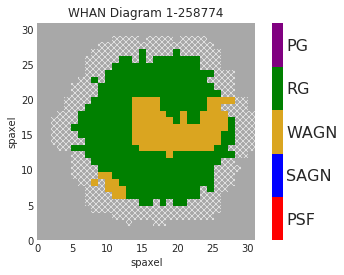

In [5]:
#Plot WHAN
cmap = colors.ListedColormap(['red', 'blue', 'goldenrod', 'green', 'purple'])

fig, ax, cb = mapplot.plot(value=value, ivar=ivar, mask=nocov, cmap=cmap, use_masks='NOCOV', return_cb=True, cbrange=(0.5, 5.5),
                           title='WHAN Diagram {}'.format(gal_id))

cb.set_ticks([1, 2, 3, 4, 5])
cb.set_ticklabels(['PSF', 'SAGN', 'WAGN', 'RG', 'PG'])

plt.show()

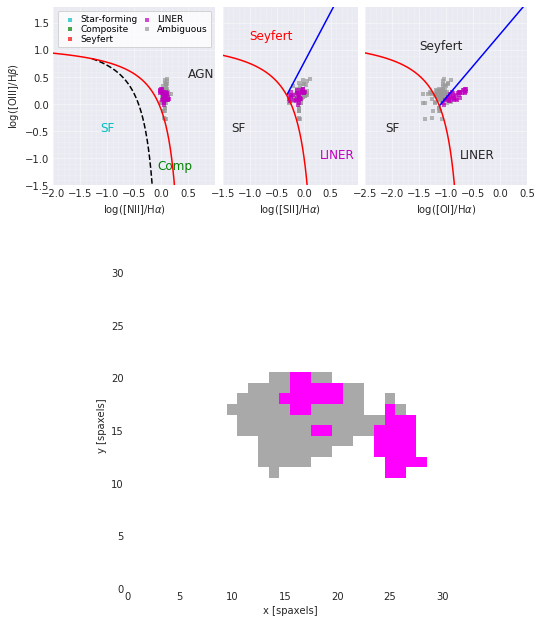

In [6]:
#Plot BPT
mask, fig, axes = maps.get_bpt()

/home/student10/.local/lib/python3.7/site-packages/marvin/utils/general/general.py:930: MarvinUserWarning: drpall file not found. Downloading it.
  warnings.warn('drpall file not found. Downloading it.', MarvinUserWarning)


SDSS_ACCESS> Done!


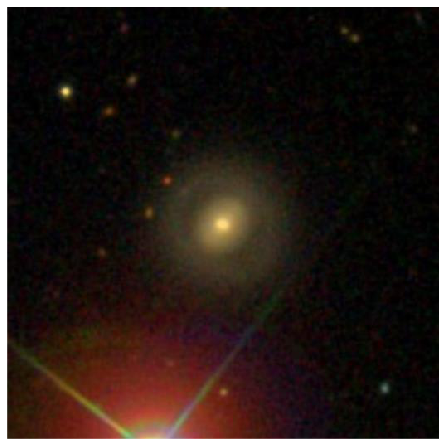

In [7]:
#Show optical image
im = Image(gal_id)
im.get_new_cutout(100, 100, scale=0.192)
ax = im.plot()